In [1]:
# %load_ext google.cloud.bigquery
# from google.cloud import bigquery

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/djbetts/opt/anaconda3/lib/

In [3]:
from datetime import datetime 
from datetime import timedelta
import datetime

In [4]:
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
geopy.geocoders.options.default_user_agent = "my-application"

geolocator = Nominatim(user_agent="myGeocoder")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return (np.nan, np.nan)

In [5]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [86]:
import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [88]:
#client = bigquery.Client()

In [89]:
data = pd.read_csv('/Users/djbetts/Desktop/jf_project/data/jf_data.csv',low_memory=False)

In [90]:
df = data.copy()

In [91]:
df.dropna(axis=1,how='all', inplace=True)

In [92]:
df.columns

Index(['geo__country', 'geo__city', 'event_params__video_title', 'event_name',
       'event_params__language'],
      dtype='object')

In [208]:
len(df.geo__country.unique())

87

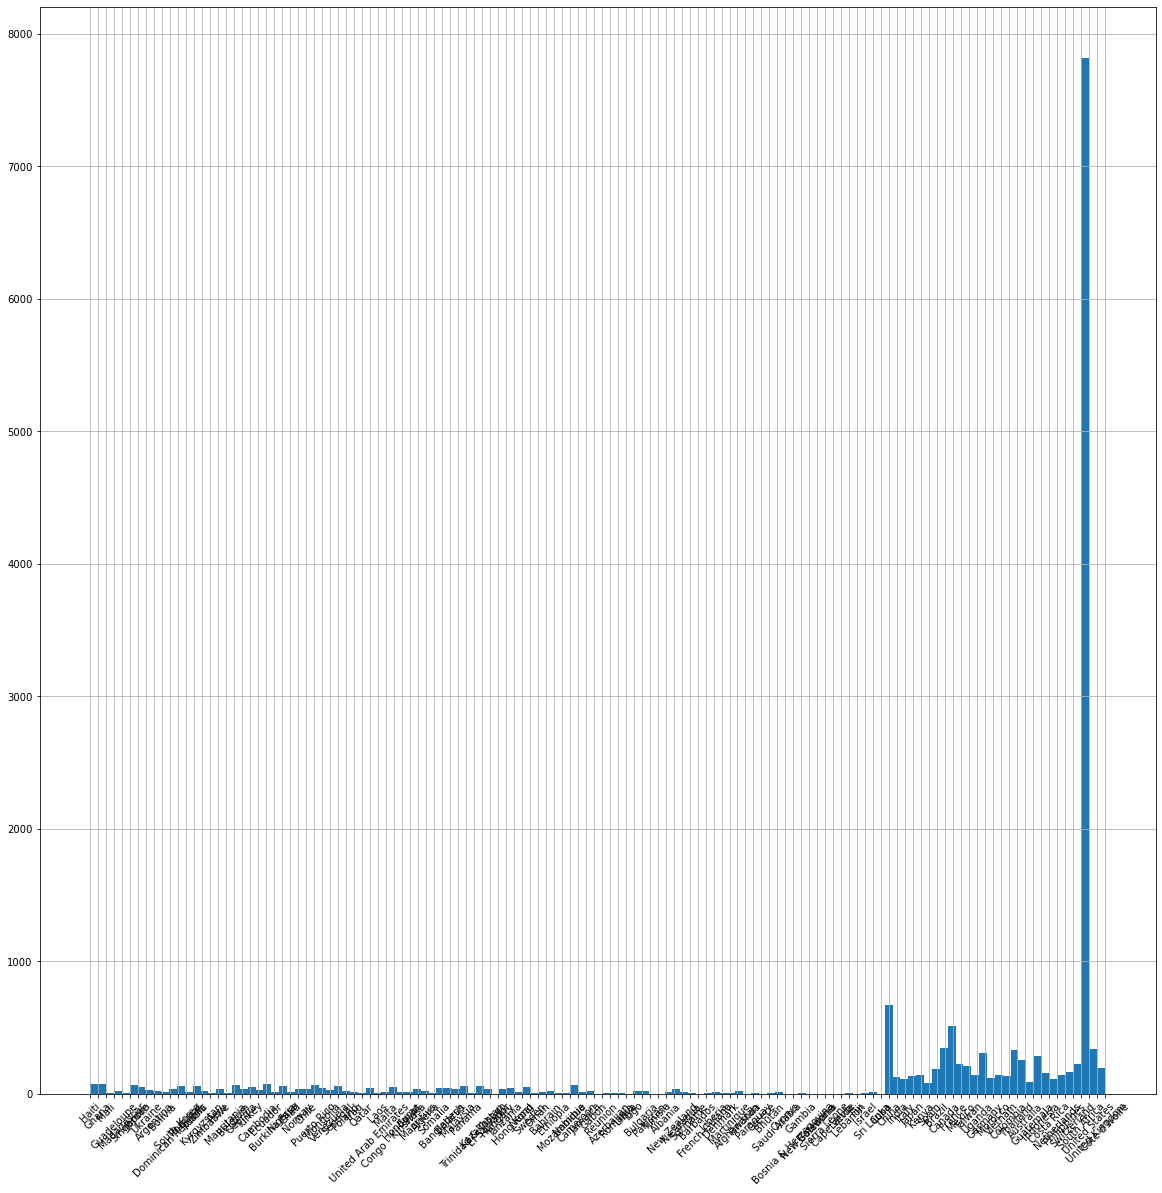

In [94]:
df.geo__country.hist(xrot=45, figsize=(20,20), bins=len(df.geo__country.unique()));

In [95]:
df.event_name.value_counts()

tap_video_details             4786
videoplay                     2599
videostarts                   2053
a_media_progress10            1110
a_media_progress25            1080
a_media_progress50             953
a_media_progress75             850
a_media_progress90             754
videocomplete                  406
language_stack_click_event     287
share_generic                  260
download_queued                232
download_media                 201
download_completed             145
pick_interest                   68
add_item_to_playlist            66
save_favorite                   52
download_failed                 36
delete_download                 15
remove_item_from_playlist       14
remove_favorite                 11
share_facebook                   7
share_email                      6
remove_interest                  5
tap_remove                       3
canceled_file_download           1
Name: event_name, dtype: int64

In [96]:
guat_city_df = df[df['geo__city'] == 'Guatemala City']

In [97]:
guat_city_df.event_name.value_counts()

tap_video_details             29
videoplay                     12
videostarts                    5
a_media_progress25             3
a_media_progress50             3
a_media_progress10             3
download_media                 1
a_media_progress75             1
download_completed             1
a_media_progress90             1
videocomplete                  1
save_favorite                  1
language_stack_click_event     1
Name: event_name, dtype: int64

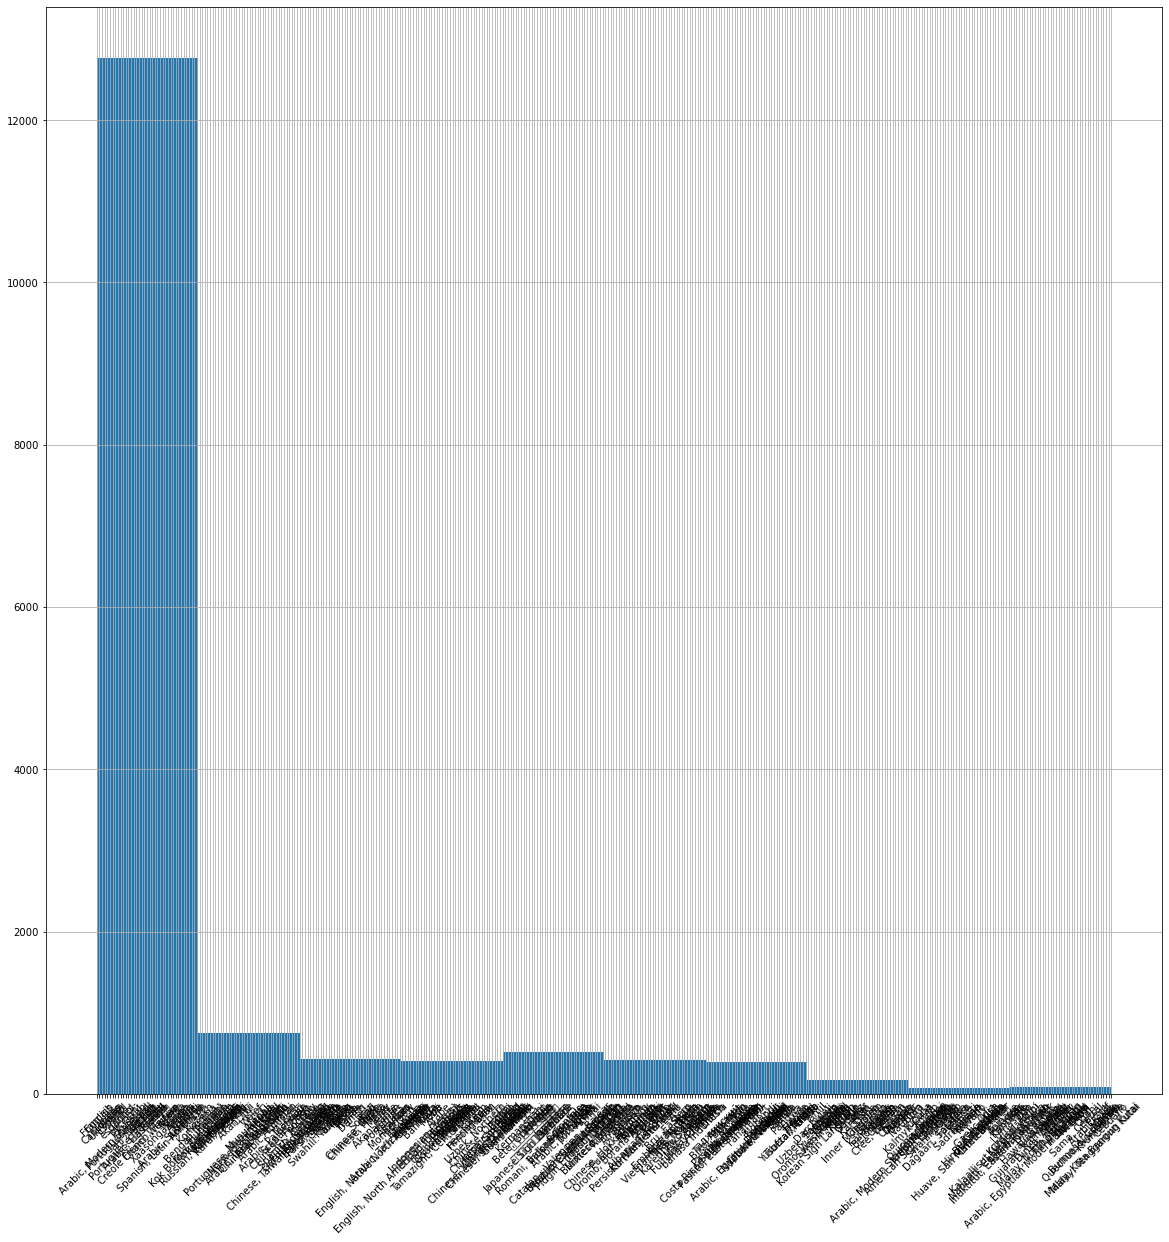

In [108]:
df.event_params__language.hist(figsize=(20,20), xrot=45);

In [99]:
df.head()

,geo__country,geo__city,event_params__video_title,event_name,event_params__language
0,Haiti,Port-au-Prince,File Zero,tap_video_details,Français
1,Haiti,Port-au-Prince,Marie de Magdala,tap_video_details,Français
2,Haiti,Port-au-Prince,JÉSUS,tap_video_details,Français
3,Haiti,Port-au-Prince,Episode 7,videocomplete,Français
4,Haiti,Port-au-Prince,Episode 11,tap_video_details,Français


In [109]:
#df.user_pseudo_id.value_counts()

In [110]:
#top user AA38C84A3E1442048F72096A4621C17A. Mr. Guatamala City

In [111]:
# dropany_df = drop_df.dropna(axis='columns', how='all')
# #how='any': 1000X24. how='all': 1000x49

In [112]:
df.event_name.value_counts()
#what is the def of these categories?

tap_video_details             4786
videoplay                     2599
videostarts                   2053
a_media_progress10            1110
a_media_progress25            1080
a_media_progress50             953
a_media_progress75             850
a_media_progress90             754
videocomplete                  406
language_stack_click_event     287
share_generic                  260
download_queued                232
download_media                 201
download_completed             145
pick_interest                   68
add_item_to_playlist            66
save_favorite                   52
download_failed                 36
delete_download                 15
remove_item_from_playlist       14
remove_favorite                 11
share_facebook                   7
share_email                      6
remove_interest                  5
tap_remove                       3
canceled_file_download           1
Name: event_name, dtype: int64

In [114]:
#df.user_pseudo_id.value_counts()

# user analysis

In [71]:
user1 = df[df['user_pseudo_id'] == '1AE4EF46D71643F386340D1630CC6082']

In [72]:
user2 = df[df['user_pseudo_id'] == 'AA38C84A3E1442048F72096A4621C17A']

In [73]:
user2.geo__city

Series([], Name: geo__city, dtype: object)

In [74]:
user2.columns

Index(['app_info__firebase_app_id', 'app_info__id', 'app_info__install_source',
       'app_info__version', 'device__advertising_id', 'device__category',
       'device__is_limited_ad_tracking', 'device__language',
       'device__mobile_brand_name', 'device__mobile_marketing_name',
       'device__mobile_model_name', 'device__mobile_os_hardware_model',
       'device__operating_system', 'device__operating_system_version',
       'device__time_zone_offset_seconds', 'device__vendor_id',
       'event_bundle_sequence_id', 'event_date', 'event_date_partition',
       'event_name', 'event_params__activity_id',
       'event_params__activity_type', 'event_params__app_name',
       'event_params__app_store_package_name',
       'event_params__campaign_info_source', 'event_params__ecid',
       'event_params__engagement_time_msec', 'event_params__error_value',
       'event_params__event_timestamp', 'event_params__fatal',
       'event_params__firebase_conversion', 'event_params__firebase_err

In [75]:
user3 = df[df['user_pseudo_id'] == '408BAF780ACD4F53B3F245E87ABF44A8']

In [76]:
user3.iloc[0]

IndexError: single positional indexer is out-of-bounds

In [77]:
user4 = df[df['user_pseudo_id'] == 'FD7E053248C94B5BB31CC094C1AE0B18']

In [78]:
user4.iloc[0]

IndexError: single positional indexer is out-of-bounds

In [79]:
df.event_date_partition.value_counts()

2020-10-08T00:00:00    7760
2020-10-07T00:00:00     604
2020-10-06T00:00:00     100
Name: event_date_partition, dtype: int64

In [80]:
drop_list = ['event_params__firebase_error', 
             'event_params__firebase_event_origin', 
             'event_params__activity_id',
             'event_params__page_location',
             'event_params__session_engaged',
             'event_params__firebase_screen',
             'event_params__session_engaged',
             'event_params__activity_type',
             'event_params__activity_type',
             'event_params__playlist_name',
             'event_params__debug_mode',
             'event_params__event_timestamp',
             'event_params__loggedinstatus',
             'event_params__logged_in_status',
             'event_params__firebase_error',
             'event_params__sideloaded',
             'event_params__firebase_screen_class',
             'event_params__firebase_screen_id',
             'event_params__source',
             'event_params__mediacomponentid',
             'event_params__ssoguid',
             'event_params__medialanguageid',
             'event_params__app_name',
             'event_params__ga_session_number',
             'event_params__ga_session_id',
             'event_params__medialength',
             'event_params__app_store_package_name',
             'event_params__grmasterpersonid',
             'event_params__medium',
             'event_params__campaign',
             'event_params__term',
             'event_params__client_id_ua',
             'event_params__medium',
             'event_params__api_session_id',
             'event_params__isstreaming',
             'event_params__cookieDomain',
             'event_params__video_title',
             'event_params__keyguid',
             'event_params__keyrelayguid',
             'event_params__videotitle',
             'event_params__lang_app_using_default_sys_lang',
             'event_params__language',
             'event_params__page_referrer',
             'event_params__language_app',
             'event_params__page_title',
             'event_params__engaged_session_event',
             'event_params__jfid',
             'event_params__ecid',
             'event_params__language_system',
             'event_params__engagement_time_msec',
             'event_params__languageid',
             'event_params__marketingcloudid',
             'event_params__screen',
             'event_params__playlistid',
             'event_params__error_value']

In [84]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8464 entries, 0 to 8463
Data columns (total 82 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   app_info__firebase_app_id                8464 non-null   object 
 1   app_info__id                             8464 non-null   object 
 2   app_info__install_source                 8464 non-null   object 
 3   app_info__version                        8464 non-null   object 
 4   device__advertising_id                   7602 non-null   object 
 5   device__category                         8464 non-null   object 
 6   device__is_limited_ad_tracking           8464 non-null   object 
 7   device__language                         8464 non-null   object 
 8   device__mobile_brand_name                8260 non-null   object 
 9   device__mobile_marketing_name            5925 non-null   object 
 10  device__mobile_model_name                8260 no

In [115]:
# SELECT 
# geo__country, 
# geo__city,
# event_params__video_title,
# event_params__videotitle,
# event_name,
# event_params__language,
# event_params__medialanguageid
# FROM `jfp-data-warehouse.production_firebase.firebase_event`  
# WHERE event_params__video_title IS NOT NULL AND
# event_params__language IS NOT NULL AND
# #event_name IN ('videostarts',  'videoplay',  'a_media_progress10',  'a_media_progress25',  'a_media_progress50',  'a_media_progress75',  'a_media_progress90') AND 
# DATE(event_date_partition) 
# BETWEEN  "2021-01-01" AND "2021-04-26" 
# LIMIT 16000

In [138]:
import src.ItemItemRecommender as helper

In [139]:
data = pd.read_csv('/Users/djbetts/Desktop/jf_project/data/jf_data.csv',low_memory=False)

In [140]:
df = data.copy()

In [141]:
df.head()

,geo__country,geo__city,event_params__video_title,event_params__videotitle,event_name,event_params__language,event_params__languageid
0,Ukraine,NaN,История Иисуса для детей,NaN,videoplay,русский,3934
1,St. Lucia,NaN,JESUS,NaN,videoplay,English,529
2,Hong Kong,NaN,抹大拉,NaN,videoplay,粵語,20601
3,Congo - Kinshasa,Kinshasa,L'histoire de Jésus pour les enfants,NaN,videoplay,Français,496
4,Congo - Kinshasa,Kinshasa,L'histoire de Jésus pour les enfants,NaN,videoplay,Français,496


In [142]:
df = helper.preprocess_df(df)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   geo__country              16000 non-null  object 
 1   geo__city                 15097 non-null  object 
 2   event_params__language    16000 non-null  object 
 3   event_params__languageid  16000 non-null  int64  
 4   video_title               16000 non-null  object 
 5   score                     16000 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 750.1+ KB


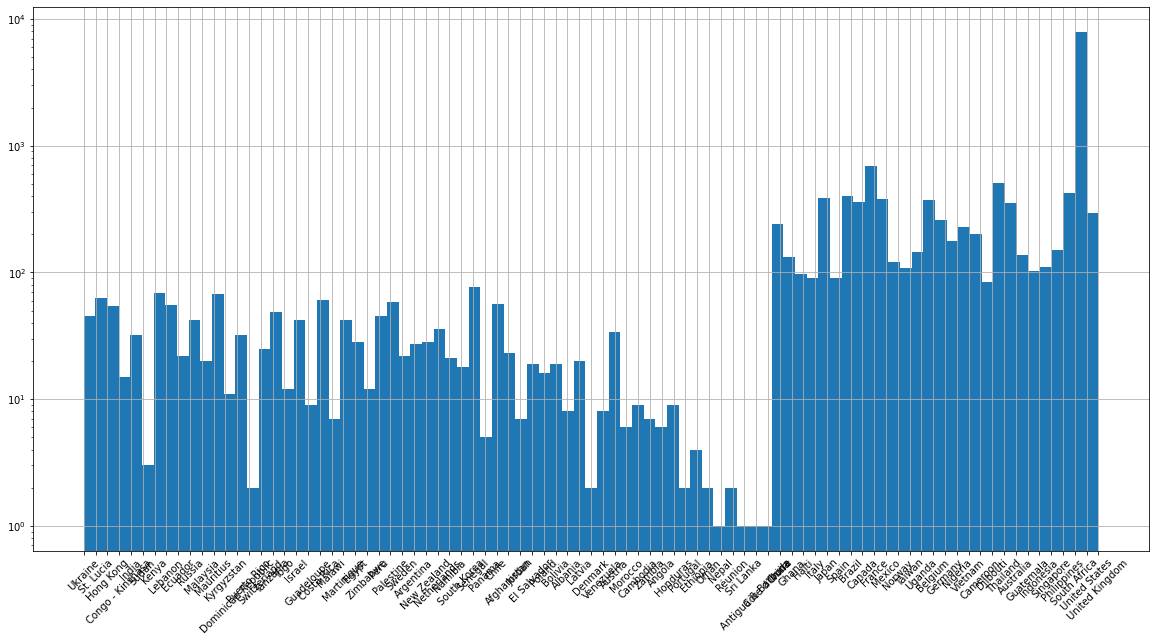

In [174]:
df.geo__country.hist(figsize=(20,10), xrot=45, bins=len(df.geo__country.unique()))
plt.yscale('log');

In [167]:
df.geo__city.value_counts()[:15]

Nashville      637
Orlando        467
Bangkok        412
Paris          384
Denver         382
Roseville      307
Brussels       252
Okazaki        224
Santa Rosa     183
London         169
Clayton        168
Lagos          160
Douala         158
(not set)      156
Los Angeles    148
Name: geo__city, dtype: int64

<AxesSubplot:>

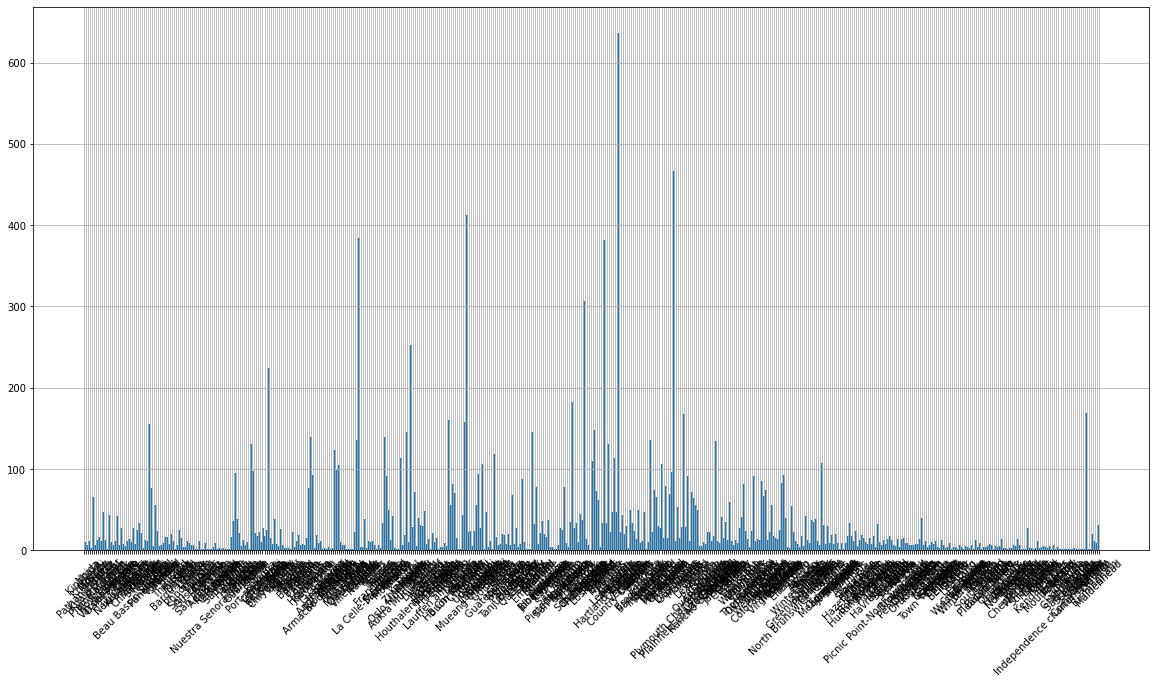

In [176]:
df.geo__city.hist(figsize=(20,10), xrot=45, bins=len(df.geo__city.unique()))
#plt.yscale('log');

In [180]:
english_df = df[df.event_params__language == 'English']

<AxesSubplot:>

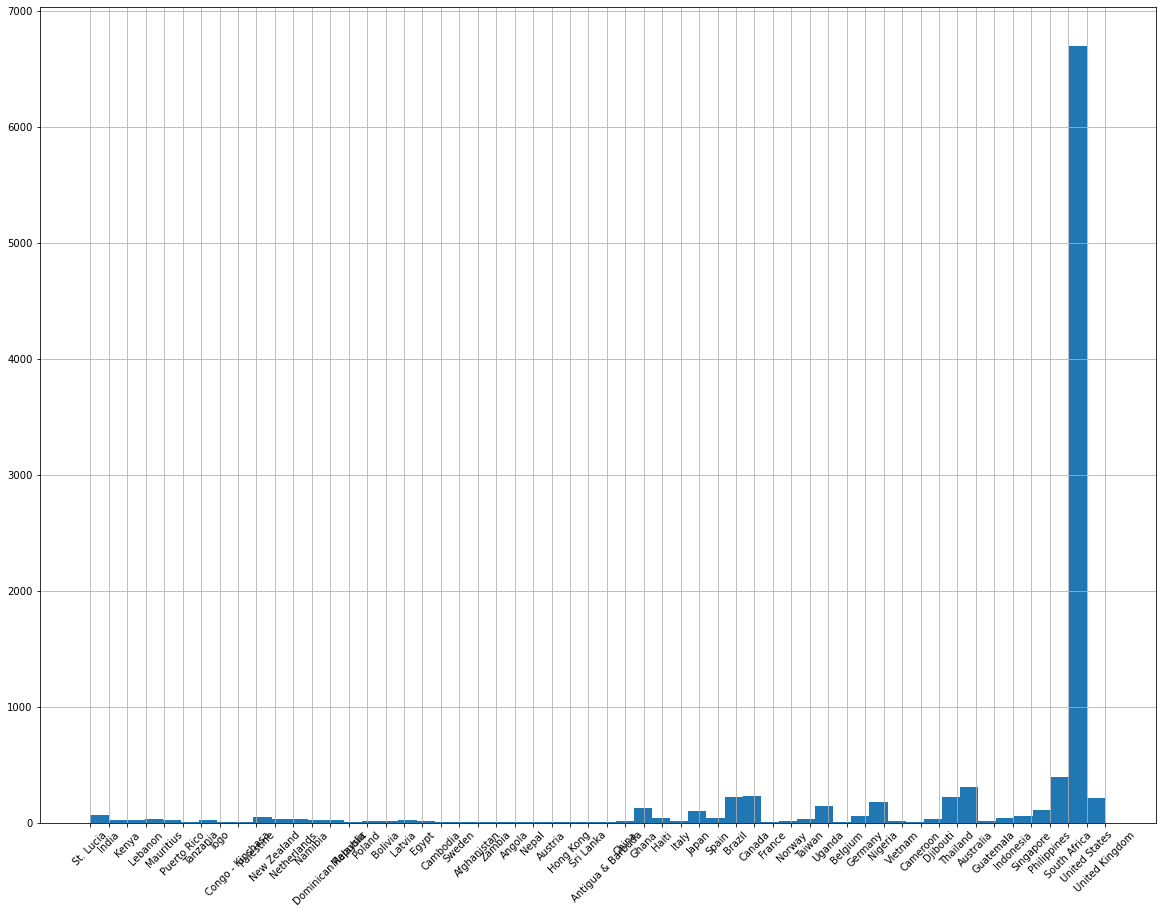

In [209]:
english_df.geo__country.hist(figsize=(20,15), 
                             xrot=45, 
                             bins=len(english_df.geo__country.unique()))
#plt.yscale('log')

<AxesSubplot:>

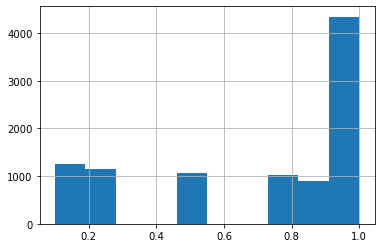

In [200]:
english_df.score.hist()